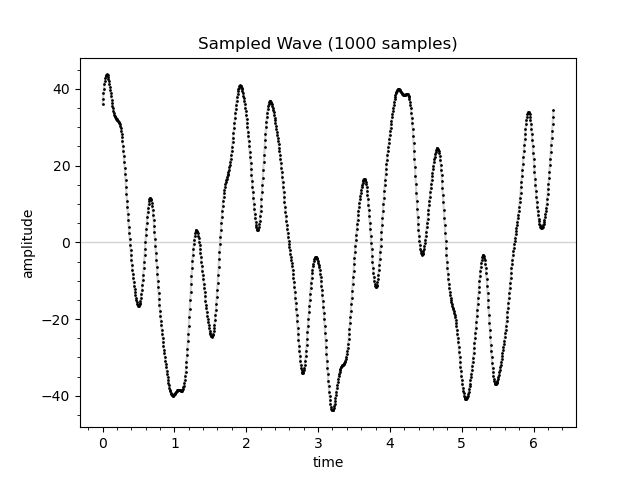

In [1]:
# make_samples.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator


def f(x):
    return (
        29 * np.cos(3 * x)
        + 7 * np.cos(19 * x)
        + 17 * np.sin(11 * x)
        + 2 * np.sin(31 * x)
    )


def plot(ax):
    sample_duration = 2 * np.pi
    num_samples = 1000 #take 1000 samples of a function

    ts = np.linspace(0, sample_duration, num_samples, endpoint=False) #don't want a duplicate
    #value at the endpoints, so endpoint exclusive. Ts is array of timestamps
    ys = f(ts) #vectorized, generate a data file (normally we don't have f(x))

    np.savetxt("samples.csv", np.vstack((ts, ys)).T, fmt="%1.13f", delimiter=", ")
    #pass in array, dump it to a text file. y value row vector sits on top of x value 
    #row vector. .T means transpose. ", " between numbers
    ax.set_title(f"Sampled Wave ({num_samples} samples)")
    ax.set_xlabel("time")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray", linewidth=1) #horizontal line at y = 0

    ax.plot(
        ts,
        ys,
        color="lightgray",
        marker="o",
        markerfacecolor="none", #markers are not filled in with color
        markersize=1,
        markeredgecolor="black",
    )

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def main():
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


main()